In [7]:
import pandas as pd
import io
import requests

# URL of the raw CSV file on GitHub
url = 'https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv'

# Fetch the CSV file using requests
response = requests.get(url)
response.raise_for_status()  # Ensure we notice bad responses

# Read the CSV file content from the response
df = pd.read_csv(io.StringIO(response.text))

# Display basic information about the dataset
print(df.head())
print(df.info())
print(df.describe())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [8]:
print(df.isnull().sum())


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


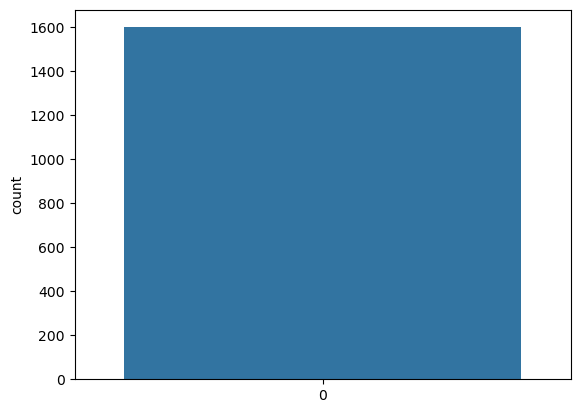

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(df['quality'])
plt.show()


In [10]:
df['quality_binary'] = (df['quality'] >= 7).astype(int)
df = df.drop('quality', axis=1)


In [11]:
from sklearn.model_selection import train_test_split

X = df.drop('quality_binary', axis=1)
y = df['quality_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

best_dt = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")


Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}


ROC-AUC: 0.8527831416337839
Accuracy: 0.903125
Precision: 0.6153846153846154
Recall: 0.7441860465116279
F1 Score: 0.6736842105263158


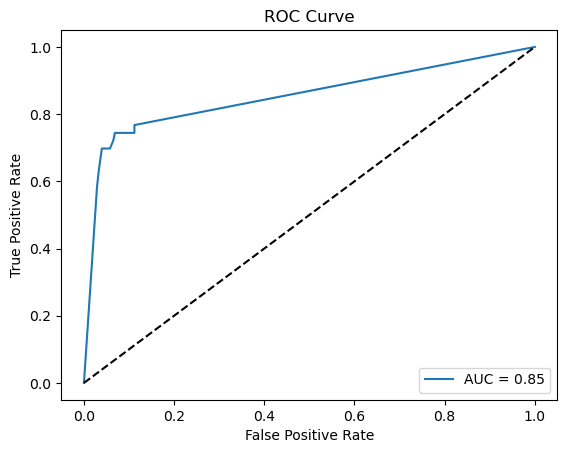

In [14]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

y_pred = best_dt.predict(X_test)
y_pred_proba = best_dt.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"ROC-AUC: {roc_auc}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {auc(fpr, tpr):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [15]:
feature_importances = pd.Series(best_dt.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances)


alcohol                 0.252536
sulphates               0.154029
total sulfur dioxide    0.105907
pH                      0.100974
residual sugar          0.092733
volatile acidity        0.067865
free sulfur dioxide     0.059891
chlorides               0.054903
citric acid             0.050066
density                 0.031834
fixed acidity           0.029261
dtype: float64


Feature Importances:
 alcohol                 0.252536
sulphates               0.154029
total sulfur dioxide    0.105907
pH                      0.100974
residual sugar          0.092733
volatile acidity        0.067865
free sulfur dioxide     0.059891
chlorides               0.054903
citric acid             0.050066
density                 0.031834
fixed acidity           0.029261
dtype: float64
Selected Features:
 Index(['alcohol', 'sulphates', 'total sulfur dioxide', 'pH', 'residual sugar',
       'volatile acidity', 'free sulfur dioxide', 'chlorides', 'citric acid'],
      dtype='object')
ROC-AUC (Selected): 0.8380908403996307
Accuracy (Selected): 0.875
Precision (Selected): 0.5294117647058824
Recall (Selected): 0.627906976744186
F1 Score (Selected): 0.5744680851063829


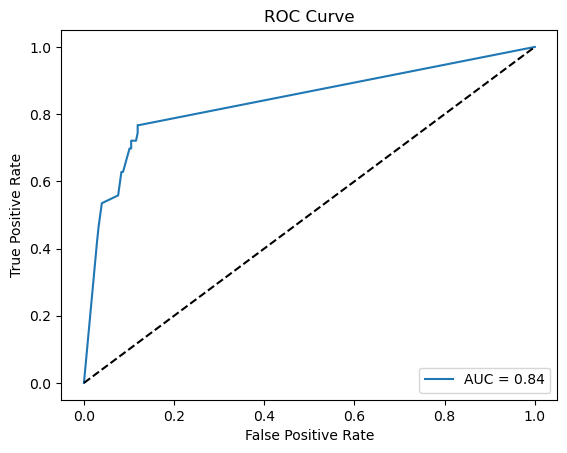

In [20]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import requests
import io

# Load the dataset
url = 'https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv'
response = requests.get(url)
df = pd.read_csv(io.StringIO(response.text))

# Create binary target variable
df['quality_binary'] = (df['quality'] >= 7).astype(int)
df = df.drop('quality', axis=1)

# Train-Test Split
X = df.drop('quality_binary', axis=1)
y = df['quality_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Decision Tree Classifier with GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)

# Best estimator from grid search
best_dt = grid_search.best_estimator_

# Feature importance
feature_importances = pd.Series(best_dt.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importances:\n", feature_importances)

# Select features with importance > 0.05
selected_features = feature_importances[feature_importances > 0.05].index
print("Selected Features:\n", selected_features)

# Get the indices of the selected features
selected_feature_indices = [X.columns.get_loc(col) for col in selected_features]

# Select these features from the scaled dataset
X_train_selected = X_train_scaled[:, selected_feature_indices]
X_test_selected = X_test_scaled[:, selected_feature_indices]

# Retrain with selected features
best_dt.fit(X_train_selected, y_train)
y_pred_selected = best_dt.predict(X_test_selected)
y_pred_proba_selected = best_dt.predict_proba(X_test_selected)[:, 1]

# Evaluate again
roc_auc_selected = roc_auc_score(y_test, y_pred_proba_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)
precision_selected = precision_score(y_test, y_pred_selected)
recall_selected = recall_score(y_test, y_pred_selected)
f1_selected = f1_score(y_test, y_pred_selected)

print(f"ROC-AUC (Selected): {roc_auc_selected}")
print(f"Accuracy (Selected): {accuracy_selected}")
print(f"Precision (Selected): {precision_selected}")
print(f"Recall (Selected): {recall_selected}")
print(f"F1 Score (Selected): {f1_selected}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_selected)
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {auc(fpr, tpr):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
